<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Libraries and Auxiliary Function


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
from sklearn.metrics import accuracy_score
import plotly.express as px


In [2]:
# function to plot the confusion matrix:

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


In [3]:
# Download dataset part 2
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
# Download dataset part 3
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Create a NumPy array Y from column 'Class'

In [5]:
# Create numpy array from column 'Class' and assign to variable 'Y'
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## Standardize the data in X


In [6]:
# Standardize data and reassign to X
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## Split data into training and test data


In [7]:
# Use function train_test_split to split the data X and Y into training and test data
# Set parameter test_size to 0.2 and random_state to 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


There are only 18 test samples.


In [8]:
Y_test.shape

(18,)

## 1. Logistic Regression Model


In [9]:
parameters_lr = {'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}

# Create logistic regression object
lr = LogisticRegression()

# Create GridSearchCV object with cv = 10 
logreg_cv = GridSearchCV(lr,parameters_lr,cv=10)

# Fit the object to find best parameters
logreg_cv.fit(X_train,Y_train)

# Display best parameters using attribute best_params_
print("tuned hyerparameters :(best parameters) ",logreg_cv.best_params_)
# Display accuracy using best_score_
print("Accuracy:",logreg_cv.best_score_)

tuned hyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


In [10]:
# Calculate accuracy using method score
test_accuracy_lr = logreg_cv.score(X_test, Y_test)
print('Score of the Logistic Regression Model: '+str(test_accuracy_lr))

Score of the Logistic Regression Model: 0.8333333333333334


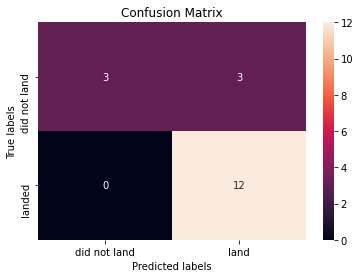

In [11]:
# Plot confusion matrix of logistic regression model
yhat_logreg = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_logreg)

### Observations

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## 2. Support Vector Machine (SVM)


In [12]:
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Create a support vector machine object 
svm = SVC()

# Create GridSearchCV object with cv - 10 
svm_cv = GridSearchCV(svm, parameters_svm,cv=10)

# Fit object to find best parameters
svm_cv.fit(X_train, Y_train)

print("tuned hyerparameters :(best parameters) ",svm_cv.best_params_)
print("Accuracy:",svm_cv.best_score_)

tuned hyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


In [13]:
# Calculate accuracy using method score
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("Score of the Support Vector Machine: "+str(test_accuracy_svm))

Score of the Support Vector Machine: 0.8333333333333334


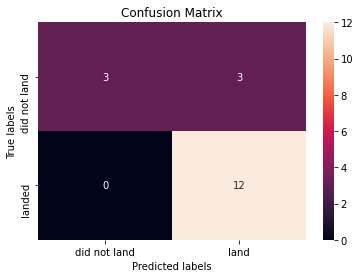

In [14]:
# Plot confusion matrix of support vector machine
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

### Observations

Again, the major problem is false positives.


## 3. Decision Tree Classifier


In [15]:
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Create a decision tree classifier object 
tree = DecisionTreeClassifier()

# Create GridSearchCV object with cv - 10
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)

# Fit object to find best parameters
tree_cv.fit(X_train, Y_train)

print("tuned hyerparameters :(best parameters) ",tree_cv.best_params_)
print("Accuracy:",tree_cv.best_score_)

tuned hyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.8767857142857143


In [16]:
# Calculate accuracy using method score
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Accuracy for our test data is: "+str(test_accuracy_tree))

Accuracy for our test data is: 0.8333333333333334


We can plot the confusion matrix


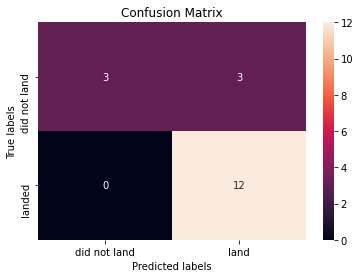

In [17]:
# Plot confusion matrix of decision tree classifier
yhat_tree = tree_cv.predict(X_test) 
plot_confusion_matrix(Y_test,yhat_tree)

## 4. K Nearest Neighbour (KNN)


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Create k nearest neighbors object 
KNN = KNeighborsClassifier()

# Create GridSearchCV object with cv = 10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit object to find best parameters
knn_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [19]:
# Calculate accuracy using method score
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy for our testing dataset with tuning is :"+str(test_accuracy_knn) )

Accuracy for our testing dataset with tuning is :0.8333333333333334


We can plot the confusion matrix


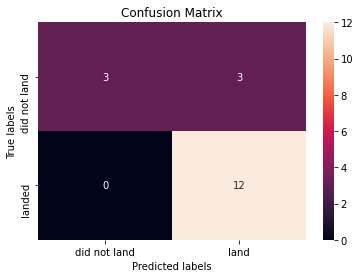

In [20]:
yhat_knn = knn_cv.predict(X_test) 
plot_confusion_matrix(Y_test, yhat_knn)

## Best-performing method


In [21]:
print('Because of the small size of the test data, the accuracy is the same for all models')

Because of the small size of the test data, the accuracy is the same for all models


In [22]:
# Set up dictionary with model scores
dict = {}
dict["Log_Reg"] = test_accuracy_lr
dict["SVM"] = test_accuracy_svm
dict["Decision Tree"] = test_accuracy_tree
dict["KNN"] = test_accuracy_knn

print(dict)

{'Log_Reg': 0.8333333333333334, 'SVM': 0.8333333333333334, 'Decision Tree': 0.8333333333333334, 'KNN': 0.8333333333333334}


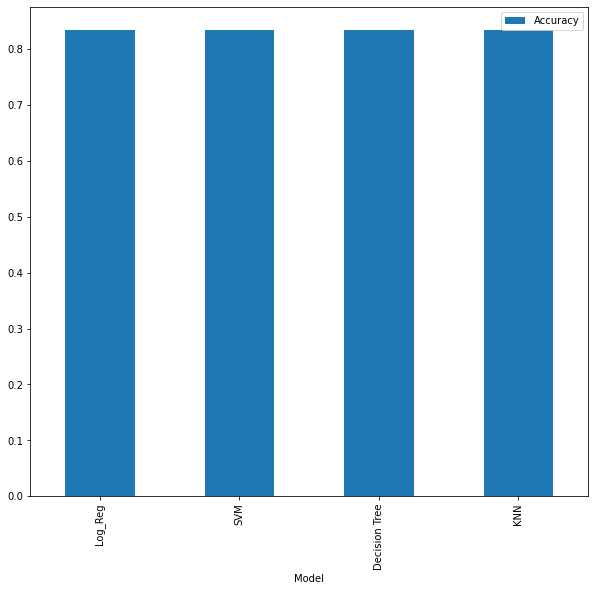

In [25]:
methods = pd.DataFrame(list(dict.items()),columns = ['Model','Accuracy'])
methods.sort_values('Accuracy', ascending=False, inplace=True, )
methods.plot(x="Model", y="Accuracy", kind="bar", figsize=(10, 9))

In [28]:

fig = px.bar(methods, y='Accuracy', x='Model', text='Accuracy', title="Accuracy of Classification Models")
fig.update_traces(texttemplate='%{text:.2}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()